# Homework 4:  Linear models

This homework assignment is designed to give you practice with linear models and the bias-variance tradeoff. 

You will need to download the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file from the *Homework/hcp_data* folder in the class GitHub repository. 


This data is a portion of the [Human Connectome Project database](http://www.humanconnectomeproject.org/). It provides measures of cognitive tasks and brain morphology measuresments from 1206 participants. The full description of each variable is provided in the **HCP_S1200_DataDictionary_April_20_2018.csv** file in the *Homework/hcp_data* folder in the class GitHub repository.

---
## 1. Loading the Data (1 point)

Use the `setwd` and `read.csv` functions to load data from the **unrestricted_trimmed_1_7_2020_10_50_44.csv** file. 

Using the tidyverse tools, make a new dataframe `d1` that only inclues the subject ID (`Subject`), gender (`Gender`), Flanker Task performance (`Flanker_Unadj`), total white matter volume (`FS_Tot_WM_Vol`), and total grey matter volume (`FS_Total_GM_Vol`) variables and remove all _na_ values.

Use the `head` function to look at the first few rows of each data frame. 

In [4]:
#INSERT CODE HERE

getwd()

setwd("/Users/jjimmyk/downloads")

unclean_data <- read.csv("unrestricted_trimmed_1_7_2020_10_50_44.csv")

View(unclean_data)

library(tidyverse)

d1 <- data.frame(unclean_data$Subject, unclean_data$Gender, unclean_data$Flanker_Unadj, unclean_data$FS_Tot_WM_Vol, unclean_data$FS_Total_GM_Vol)

head(d1)

d1 <- na.omit(d1)

head(d1)



[1] "/Users/jjimmyk/Downloads"

Subject,Release,Acquisition,Gender,Age,MMSE_Score,PSQI_Score,PSQI_Comp1,PSQI_Comp2,PSQI_Comp3,⋯,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,⋯,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
100004,S900,Q06,M,22-25,29,8,1,2,2,⋯,5.2,101.12,86.45,2,45.9,107.17,105.31,1.80,0,1.80
100206,S900,Q11,M,26-30,30,6,1,1,1,⋯,6.0,108.79,97.19,1,49.7,72.63,72.03,1.84,0,1.84
100307,Q1,Q01,F,26-30,29,4,1,0,1,⋯,3.6,101.12,86.45,0,38.6,71.69,71.76,1.76,0,1.76
100408,Q3,Q03,M,31-35,30,4,1,1,0,⋯,2.0,108.79,98.04,2,52.6,114.01,113.59,1.76,2,1.68
100610,S900,Q08,M,26-30,30,4,1,1,0,⋯,2.0,122.25,110.45,0,38.6,84.84,85.31,1.92,1,1.88
101006,S500,Q06,F,31-35,28,2,1,1,0,⋯,6.0,122.25,111.41,0,38.6,123.80,123.31,1.80,0,1.80
101107,S500,Q06,M,22-25,29,9,1,1,3,⋯,6.8,108.79,97.19,1,50.1,134.65,131.38,1.84,0,1.84
101208,S1200,Q12,F,31-35,30,6,1,2,0,⋯,4.4,101.12,87.11,1,50.1,105.57,102.32,1.92,0,1.92
101309,S500,Q06,M,26-30,29,5,1,1,2,⋯,5.2,122.25,110.45,0,38.6,106.39,104.39,1.80,0,1.80


,unclean_data.Subject,unclean_data.Gender,unclean_data.Flanker_Unadj,unclean_data.FS_Tot_WM_Vol,unclean_data.FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
1,100004,M,121.97,NA,NA
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632


,unclean_data.Subject,unclean_data.Gender,unclean_data.Flanker_Unadj,unclean_data.FS_Tot_WM_Vol,unclean_data.FS_Total_GM_Vol
,<int>,<chr>,<dbl>,<int>,<int>
2,100206,M,130.42,543134,807245
3,100307,F,112.56,407292,664124
4,100408,M,121.18,500417,726206
5,100610,M,126.53,512946,762308
6,101006,F,101.85,429449,579632
7,101107,M,107.04,416995,665024


---
## 2. Initial data visualization (2 point)

Use the `pairs` function to look at all the pairwise scatterplots of the variables in `d1`. Describe which variables seem positively correlated, negatively correlated, or not correlated at all.

,unclean_data.Subject,unclean_data.Gender,unclean_data.Flanker_Unadj,unclean_data.FS_Tot_WM_Vol,unclean_data.FS_Total_GM_Vol
,<int>,<fct>,<dbl>,<int>,<int>
2,100206,1,130.42,543134,807245
3,100307,0,112.56,407292,664124
4,100408,1,121.18,500417,726206
5,100610,1,126.53,512946,762308
6,101006,0,101.85,429449,579632
7,101107,1,107.04,416995,665024


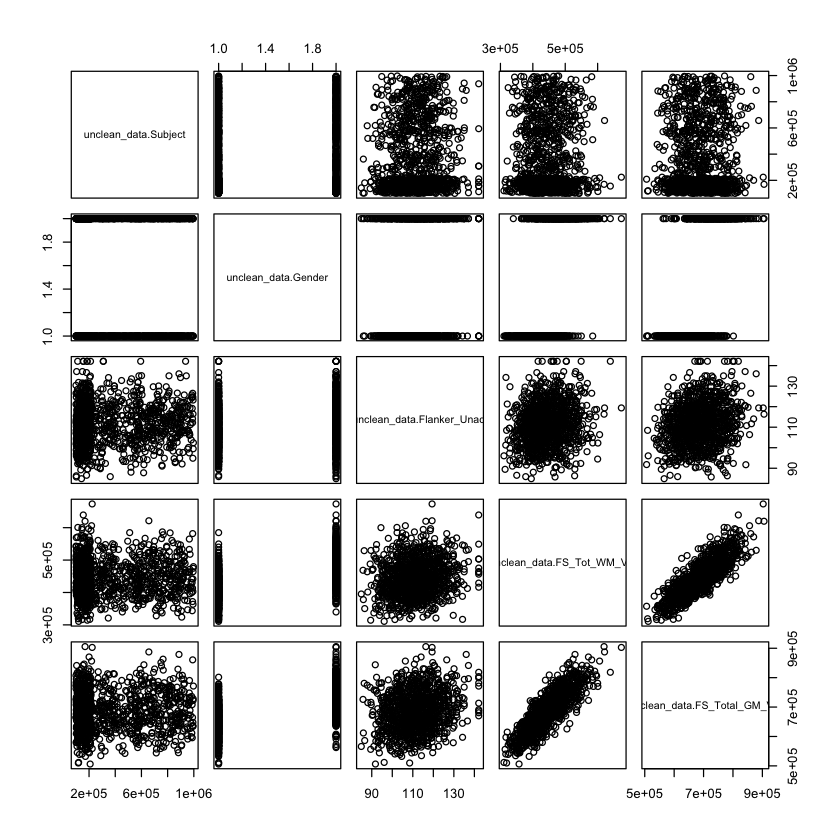

In [5]:
#INSERT CODE HERE
##Make gender a numeric variable so pairs can run on the data frame.
d1$unclean_data.Gender <- factor(d1$unclean_data.Gender, levels = c("F", "M"), labels = c("0", "1"))

head(d1)

pairs(d1)


> It appears that white matter and grey matter values are positively correlated, based on the visualizations. None of the variables appear to be negatively correlated; there appears to be no correlation between any other variables.

---
## 3. Linear regression (4 points)

Use the `lm` (linear model) function to determine the association between Flanker Task performance and total grey matter volume from the `d1` data frame.

$$
Y_{flanker} = \beta_0 + \beta_1 X_{GM volume}
$$

Show the results using the `summary` function, and report the mean coefficient values for $beta_0$ \& $\beta_1$ (`coef` function) and their 95\% confidence intervals (`confint` function). Is grey matter volume significantly associated with Flanker Task performance?

In [6]:
#INSERT CODE HERE
lm.fit = lm(unclean_data.FS_Total_GM_Vol~unclean_data.Flanker_Unadj, data = d1)

summary(lm.fit)

coef(lm.fit) [1]

coef(lm.fit) [2]

print(confint(lm.fit))



Call:
lm(formula = unclean_data.FS_Total_GM_Vol ~ unclean_data.Flanker_Unadj, 
    data = d1)

Residuals:
    Min      1Q  Median      3Q     Max 
-171972  -47564   -4521   47243  213109 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                532412.1    21877.5  24.336  < 2e-16 ***
unclean_data.Flanker_Unadj   1376.2      195.3   7.048 3.18e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 65620 on 1111 degrees of freedom
Multiple R-squared:  0.0428,	Adjusted R-squared:  0.04194 
F-statistic: 49.68 on 1 and 1111 DF,  p-value: 3.177e-12


(Intercept) 
   532412.1

unclean_data.Flanker_Unadj 
                   1376.21

                                 2.5 %     97.5 %
(Intercept)                489486.2573 575338.008
unclean_data.Flanker_Unadj    993.0943   1759.327


> Yes, according to the p-value < .05, GM volume is significantly associated with Flanker Task performance.

---
## 4. Plotting (2 points)

Use `ggplot` to plot the `FS_Total_GM_Vol` variable (x axis) against the `Flanker_Unadj` variable (y axis), as well as the regression line with confidence intervals on the regrssion line. Qualitatively describe what you see. 


The downloaded binary packages are in
	/var/folders/y9/6115vtcn20d2bkkn_2tztqfh0000gn/T//RtmpN1aZHM/downloaded_packages


`geom_smooth()` using formula 'y ~ x'



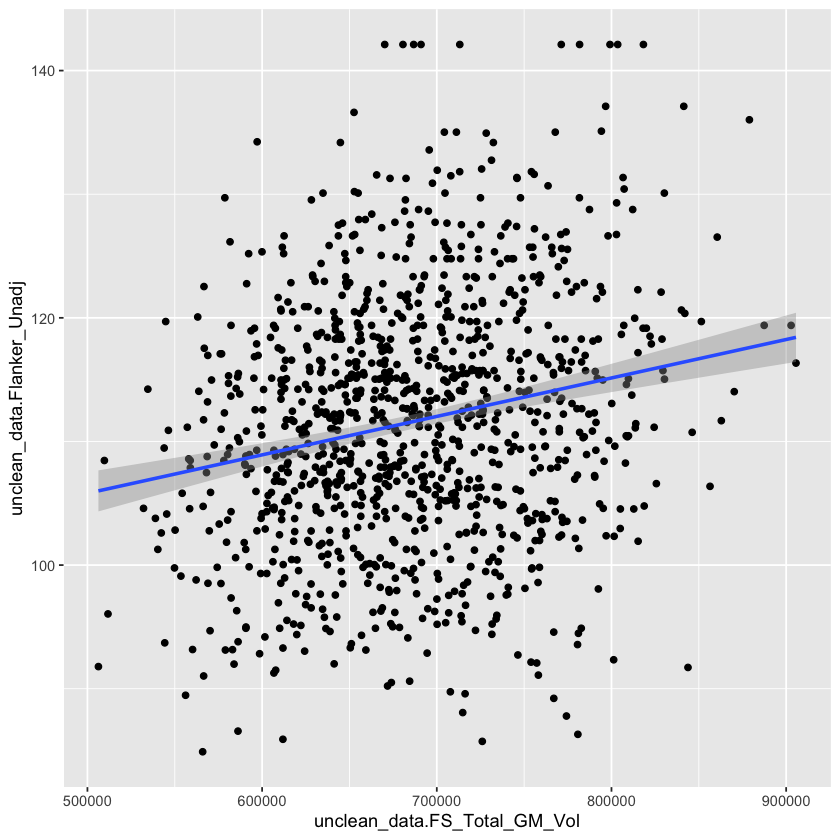

In [7]:
#INSERT CODE HERE
install.packages("repr")
library(repr)

options(scipen = 999)

ggplot(aes(unclean_data.FS_Total_GM_Vol, unclean_data.Flanker_Unadj), data = d1) +
  geom_point() +
  geom_smooth(method = 'lm',se = TRUE)


> Based on the regression line and accompanying confidence intervals, it appears that there is a positive, linear relationship between GM volume and Flanker Task performance. This relationship is not immediately visible or intuitive without the regression line.

---

## 5. Reflection (1 point)

What do you conclude based on the analyses above?

> We cannot rely on the naked eye to evaluate whether there is a relationship between variables depicted in a visualization. After running the pairs function, it did not initially seem that there was a relationship between grey matter volume and Flanker; however, further analysis revealed that there is a significant relationship and that it is possible to visualize this relationship using a regression line.

**DUE:** 5pm EST, March 4, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> Marc Levesque